# Exploratory Factor Analysis

## Exercise 1: The Dataset

Remember the `diabetes` dataset which we used in a few weeks ago to predict the presence of diabetes. This week, our goal will be to explore the six blood serum measures, aiming to find underlying factors within them.

The data is already loaded and processed. Please do the following:
1. Print and read through the description of the dataset using the `.DESCR` attribute 
2. Inspect the DataFrame and check if it contains the correct variables
3. Plot the correlation matrix of the blood serum measures (e.g. with `sns.heatmap()` or `plt.imshow()`).

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

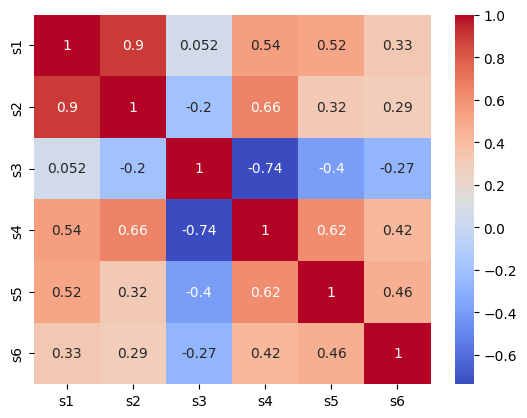

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the six blood serum measures (s1-s6) of the diabetes dataset
diabetes_data = datasets.load_diabetes(as_frame=True)
df = diabetes_data.data[['s1', 's2', 's3', 's4', 's5', 's6']]

print(diabetes_data.DESCR)
print(df.head())
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

## Exercise 2: Fitting the Model

Use `factor_analyzer` package to fit a first non-rotated model with the `minres` optimizer and the number of factors corresponding to the number of items. Determine the most suitable number of factors using the Kaiser criterion.

[3.27565985 1.30852971 0.80016549 0.52650327 0.08052117 0.00862051]


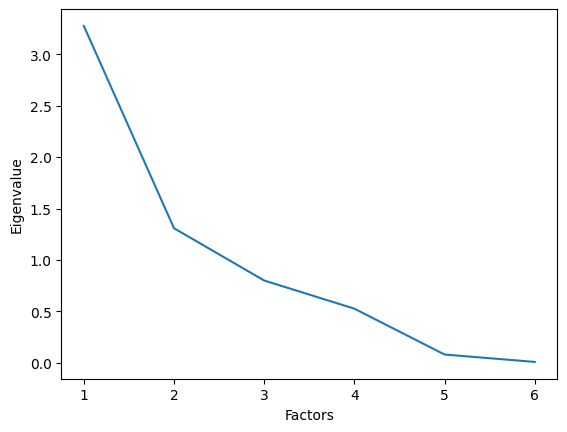

In [ ]:
from factor_analyzer import FactorAnalyzer

# Fit the initial model
fa = FactorAnalyzer(rotation=None, n_factors=6)
fa.fit(df)

# Determine the number of factors
ev, __ = fa.get_eigenvalues()
print(ev)

ax = sns.lineplot(x=range(1, len(ev) + 1), y=ev)
ax.set_xlabel("Factors")
ax.set_ylabel("Eigenvalue");

## Exercise 3: Loadings & Communalities

After selecting the number of factors, fit a final model with `oblimin` rotation. Print the rotated factor loadings and communalities. Do the communalities suggest a good model fit?

In [23]:
fa2 = FactorAnalyzer(n_factors=2, rotation='oblimin')
fa2.fit(df)

print("Loadings:\n", fa2.loadings_)
print("Communalities:", fa2.get_communalities())

Loadings:
 [[ 1.04095052 -0.06391605]
 [ 0.79721715  0.14763963]
 [ 0.23543195 -0.9377997 ]
 [ 0.36511127  0.81892308]
 [ 0.33348504  0.46899681]
 [ 0.24832244  0.34203792]]
Communalities: [1.08766324 0.65735264 0.93489647 0.80394125 0.33117028 0.17865398]


## Voluntary exercise 1: Improving the Fit

Look again at the **Communalities**. Some variables are badly represented by the factor structure. Exclude them and fit the model again. Did the fit improve? 

In [24]:
# Exclude variables
df = df.drop(columns=['s5', 's6']) #s5 & s6 have low communalities, meaning they are not well represented by the factor structure

# Fit the model
fa3 = FactorAnalyzer(n_factors=2, rotation='oblimin')
fa3.fit(df)

# Get loadings
l = fa3.loadings_
print(l)

# Get communalities
c = fa3.get_communalities()
print(c)

[[ 1.017817    0.12752987]
 [ 0.89155588 -0.12630942]
 [ 0.13112868  1.01673845]
 [ 0.48566271 -0.70742639]]
[1.05221532 0.81082596 1.05095181 0.73632037]
